<a href="https://colab.research.google.com/github/srkpriyanka95/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Have you ever wondered when is the best time of the year to book a hotel room is? or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This dataset contains information for a city hotel and a resort hotel.Lets Explore and Analyse the data to discover important factors that govern the bookings.** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Let's load the data to be analysed
hotel=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Hotel Booking Analysis - Priyanka/Hotel Bookings.csv')

In [ ]:
#Let's check how big is the data
hotel.shape

(119390, 32)

In [ ]:
#Now it time to know the features of the observations
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Let's look deeper into the data
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Let us take a closer look into the dataset
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Data Not Entered,Data Not Entered,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Data Not Entered,Data Not Entered,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,Data Not Entered,Data Not Entered,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Data Not Entered,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Data Not Entered,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Let's have a look at the end of the dataset
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# its good to make sure what we are dealing with
hotel['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#Let's look how many years of data we have
hotel['arrival_date_year'].unique()

array([2015, 2016, 2017])

#**We know that the dataset comprises three years of data. But we don't know whether it holds details about all months of the year. Let us look at the particulars to get more insights about when it starts and ends.**

In [ ]:
#Its the start date of data
hotel[['arrival_date_day_of_month','arrival_date_year','arrival_date_month']].iloc[0]

arrival_date_day_of_month       1
arrival_date_year            2015
arrival_date_month           July
Name: 0, dtype: object

In [ ]:
#Look the end date of data
hotel[['arrival_date_day_of_month','arrival_date_year','arrival_date_month']].iloc[-1]

arrival_date_day_of_month        29
arrival_date_year              2017
arrival_date_month           August
Name: 119389, dtype: object

#**Now we have a better idea about how the data looks and what information we have for the analysis. But the data may also have null values. So let's find out whether we have any. If so, let's see how we deal with nulls**

In [5]:
#Its time to know, whether we have any null values
hotel.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [13]:
#Now we know about the columns that has null values.
# So, now we can fill up relevant input to replace null in those columns
hotel.fillna('Data Not Entered',inplace=True)

In [14]:
#Let's check again and see if all nulls have been handled.
hotel.isnull().any().sum()

0

In [26]:
#lets check is all null values is replaced with the provided text
print(hotel.query('country=="Data Not Entered"').shape[0])
print(hotel.query('company=="Data Not Entered"').shape[0])
print(hotel.query('agent=="Data Not Entered"').shape[0])
print(hotel.query('children=="Data Not Entered"').shape[0])

488
112593
16340
4


#**Let's dig deeper and see how the data is been spread in the dataset.**

# **Number of bookings over the years**

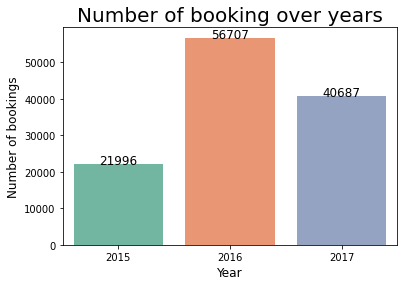

In [28]:
#How many years of data do we have, and how are the bookings differ from each year
sns.set_palette("Set2")
booking_by_year=sns.countplot(data=hotel,x='arrival_date_year')
booking_by_year.set_xlabel('Year',fontsize=12)
booking_by_year.set_ylabel('Number of bookings',fontsize=12)
booking_by_year.set_title('Number of booking over years',fontsize=20)
booking_by_year.set_xticklabels(booking_by_year.get_xticklabels(),rotation=0)
for n in booking_by_year.patches:
  booking_by_year.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

# **Which hotel is preffered or booked by customers?**

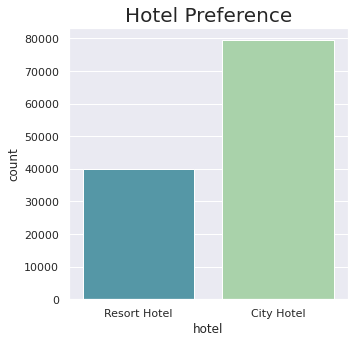

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [68]:
#Which type of hotels are booked more
sns.set(rc={"figure.figsize":(5, 5)})
sns.set_palette('Spectral_r')
hotel_preference=sns.countplot(data=hotel,x='hotel')
hotel_preference.set_title('Hotel Preference',fontsize=20)
plt.show()
hotel['hotel'].value_counts()

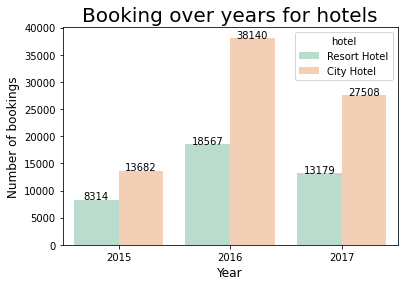

In [41]:
#There are two types of hotels.Which one did customers prefer the most
hotel_over_years=sns.countplot(data=hotel,x='arrival_date_year',hue='hotel')
sns.set_palette('Pastel2')
hotel_over_years.set_xlabel('Year',fontsize=12)
hotel_over_years.set_ylabel('Number of bookings',fontsize=12)
hotel_over_years.set_title('Booking over years for hotels',fontsize=20)
hotel_over_years.set_xticklabels(booking_by_year.get_xticklabels(),rotation=0)
for n in hotel_over_years.patches:
  hotel_over_years.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=10)
plt.show()

#**Let's look at how bookings differ for different months of the year.**

In [ ]:
#Total bookings over months
#As arrival month data is string we are just replacing it temporarily for groupby
month_wise_booking = hotel.replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11 ,'December':12}).groupby(['arrival_date_year','arrival_date_month'],as_index=False)['hotel'].count().sort_values(['arrival_date_year','arrival_date_month'],ascending=[False,True]).replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November' ,12:'December'})
month_wise_booking

,arrival_date_year,arrival_date_month,hotel
18,2017,January,3681
19,2017,February,4177
20,2017,March,4970
21,2017,April,5661
22,2017,May,6313
23,2017,June,5647
24,2017,July,5313
25,2017,August,4925
6,2016,January,2248
7,2016,February,3891


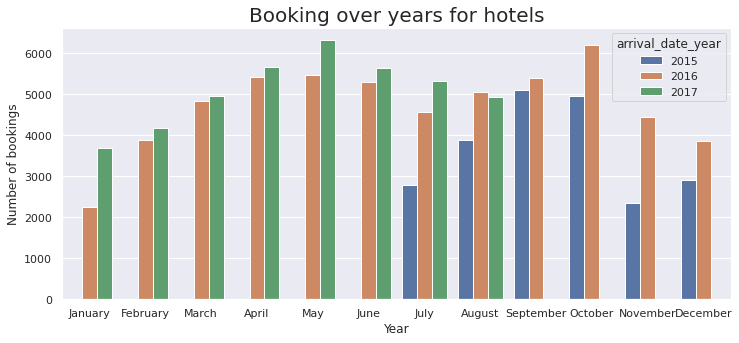

In [ ]:
bookings_over_months=sns.barplot(data=month_wise_booking,x='arrival_date_month',y='hotel',hue='arrival_date_year')
sns.set(rc={"figure.figsize":(12, 5)})
bookings_over_months.set_xlabel('Year',fontsize=12)
bookings_over_months.set_ylabel('Number of bookings',fontsize=12)
bookings_over_months.set_title('Booking over years for hotels',fontsize=20)
bookings_over_months.set_xticklabels(bookings_over_months.get_xticklabels(),rotation=0)
plt.show()


#**Percentage of booking being cancelled**


In [ ]:
import plotly.express as px

In [ ]:
booking_cancellation = hotel['is_canceled'].value_counts().reset_index()
booking_cancekation_plot = px.pie(booking_cancellation,values=booking_cancellation['is_canceled'],names=['Not Cancelled','Cancelled'],color_discrete_sequence=px.colors.sequential.Mint,width=500,height=500)
booking_cancekation_plot.update_layout(title='Cancellation of Bookings',title_x=0.2,title_y=0.9)
booking_cancekation_plot.show()

#**Country from which most clients are from**

In [29]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=8adf97eb6ccc46953bfff8ae51cff4c328c4058a96369f1966a8f6d6a280df60
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [30]:
#Country names are not given in the data,it onl containa abbrevations.so,Lets get the country name using pycountry
import pycountry
def get_country_code(x):
    try:
        return pycountry.countries.get(alpha_3=x).name
    except:
        return "not found"
hotel['country_name'] = hotel.apply(lambda x:get_country_code(x['country']),axis=1)

In [31]:
country_wise_count=hotel.groupby(['country','country_name'],as_index=False)['hotel'].count().sort_values('hotel',ascending=False)
country_wise_count.rename(columns={'hotel':'Number_of_Bookings'},inplace=True)
#Removing country names with fewer bookings
country_wise_count.query('Number_of_Bookings>=100',inplace=True)
country_wise_count

,country,country_name,Number_of_Bookings
136,PRT,Portugal,48590
60,GBR,United Kingdom,12129
57,FRA,France,10415
52,ESP,Spain,8568
43,DEU,Germany,7287
82,ITA,Italy,3766
77,IRL,Ireland,3375
15,BEL,Belgium,2342
25,BRA,Brazil,2224
124,NLD,Netherlands,2104


In [32]:
import plotly.express as px
Country_wise=px.choropleth(country_wise_count,locations='country',color='Number_of_Bookings',scope='world')

In [35]:
Country_wise.show()

#**Differnt Market Segment , which hotel do they prefer and their Adr contribution**

In [ ]:
market_segment_Adr = hotel.groupby(['market_segment','hotel'],as_index=False).agg({'adr':'sum'}).sort_values('adr',ascending=False)
market_segment_Adr['adr']=market_segment_Adr['adr'].apply(round)
#removing values that are having very low adr
msa = market_segment_Adr.query('adr>10000')
msa

,market_segment,hotel,adr
11,Online TA,City Hotel,4607894
12,Online TA,Resort Hotel,2011044
9,Offline TA/TO,City Hotel,1557767
7,Groups,City Hotel,1186783
5,Direct,City Hotel,727990
6,Direct,Resort Hotel,727312
10,Offline TA/TO,Resort Hotel,557879
8,Groups,Resort Hotel,387784
3,Corporate,City Hotel,248196
4,Corporate,Resort Hotel,119059


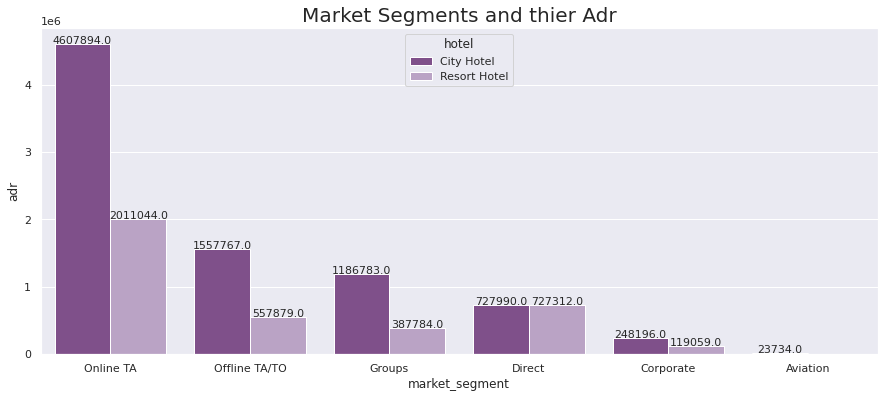

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
sns.set_palette('PRGn')
market_segment_adr_plot=sns.barplot(data=msa,x='market_segment',y='adr',hue='hotel')
market_segment_adr_plot.set_title('Market Segments and thier Adr',fontsize=20)
for n in market_segment_adr_plot.patches:
  market_segment_adr_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=11)
plt.show()


#**Customers from which segment tends to cancel the bookings?**

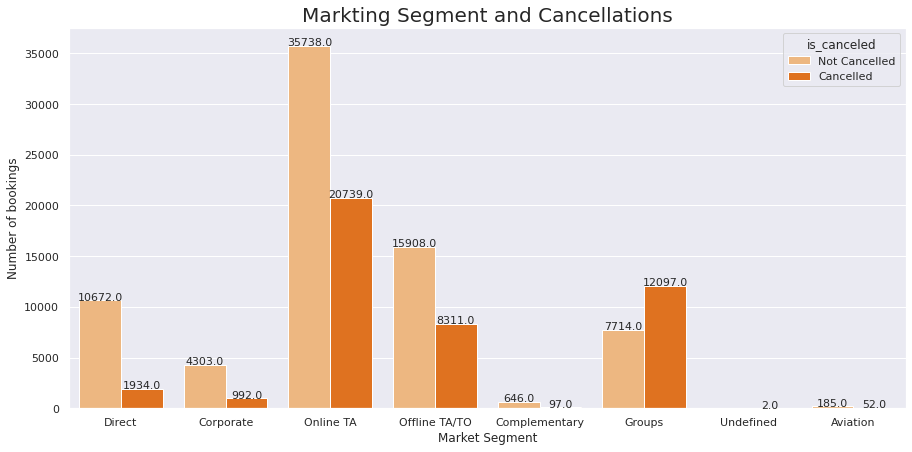

In [ ]:
Guest_type_and_cancellations=hotel.copy()
Guest_type_and_cancellations['is_repeated_guest'].replace({0:'Not a Repeated Guest',1:'Repeated Guest'},inplace=True)
Guest_type_and_cancellations['is_canceled'].replace({0:'Not Cancelled',1:'Cancelled'},inplace=True)
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_palette('gist_heat_r')
Guest_type_and_cancellation_plot=sns.countplot(data=Guest_type_and_cancellations,hue='is_canceled',x='market_segment')
Guest_type_and_cancellation_plot.set_xlabel('Market Segment',fontsize=12)
Guest_type_and_cancellation_plot.set_ylabel('Number of bookings',fontsize=12)
Guest_type_and_cancellation_plot.set_title('Markting Segment and Cancellations',fontsize=20)
for n in Guest_type_and_cancellation_plot.patches:
  Guest_type_and_cancellation_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=11)
plt.show()

#**Different types of customers**

In [ ]:
customer_type=hotel.groupby(['customer_type'],as_index=False)['hotel'].count()
customer_type.rename(columns={'hotel':'Count'},inplace=True)

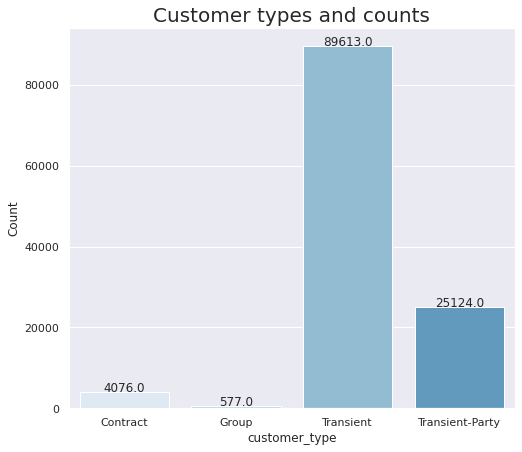

In [ ]:
sns.set(rc={"figure.figsize":(8, 7)})
sns.set_palette('Blues')
customer_plot=sns.barplot(data=customer_type,x='customer_type',y='Count')
customer_plot.set_title('Customer types and counts',fontsize=20)
for n in customer_plot.patches:
  customer_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

#**There is a Difference in rooms prefered and rooms assigned... Let us see what difference does it make to the bookings**


In [85]:
#using groupby function to get the count of room refernces
preferred_room=hotel.groupby(['reserved_room_type'],as_index=False)['hotel'].count().sort_values('hotel',ascending=False)
preferred_room

,reserved_room_type,hotel
0,A,85994
3,D,19201
4,E,6535
5,F,2897
6,G,2094
1,B,1118
2,C,932
7,H,601
9,P,12
8,L,6


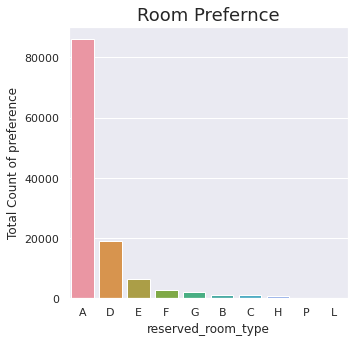

In [92]:
preferred_room_plot=sns.barplot(data=preferred_room,x='reserved_room_type',y='hotel')
preferred_room_plot.set_title('Room Prefernce',fontsize=18)
preferred_room_plot.set_ylabel('Total Count of preference')
plt.show()

In [ ]:
#writing a functionn to return value 1 if the reserved room and assigned room are same else it eill return 0
def same(n,x):
  try:
    if (n == x):
      return 1
    else :
      return 0
  except:
    return 0
hotel['same_rooms_assigned'] = hotel.apply((lambda x: same(x['assigned_room_type'],x['reserved_room_type'])),axis=1)

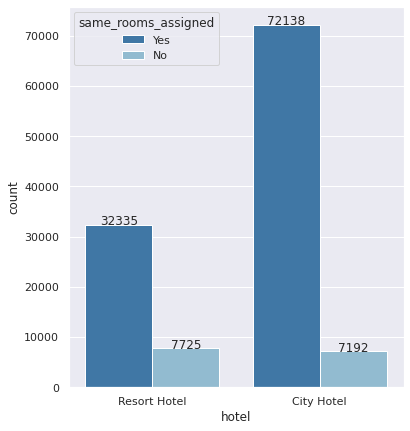

In [ ]:
#Creating a copy of the dataset can be helpful in case we have boolean values in our columns because it will return an error when we try to use plots.
room_type=hotel.copy()
room_type['same_rooms_assigned'].replace({0:'No',1:'Yes'},inplace=True)
sns.set(rc={'figure.figsize':(6,7)})
sns.set_palette('RdBu_r')
same_room_plot=sns.countplot(data=room_type,x='hotel',hue='same_rooms_assigned')
for n in same_room_plot.patches:
  same_room_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()


#**Distribution Channel**

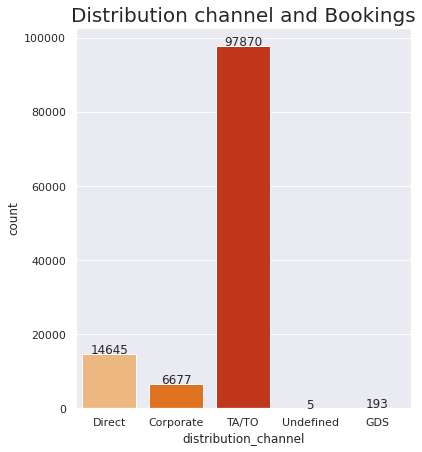

In [ ]:
sns.set_palette('gist_heat_r')
distribution_channel_plot=sns.countplot(data=hotel,x='distribution_channel')
distribution_channel_plot.set_title('Distribution channel and Bookings',fontsize=20)
for n in distribution_channel_plot.patches:
  distribution_channel_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

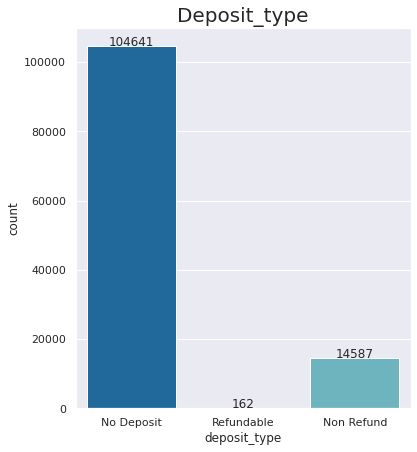

In [127]:
sns.set_palette('GnBu_r')
deposit_plot=sns.countplot(data=hotel,x='deposit_type')
deposit_plot.set_title('Deposit_type',fontsize=20)
for n in deposit_plot.patches:
  deposit_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()

#**Let us see,If there is any relationship between Deposit type and cancellation**

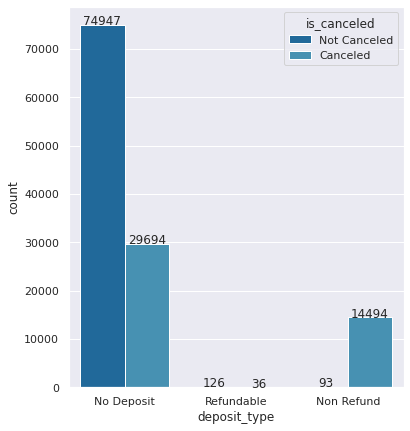

In [131]:
deposit=hotel.copy()
deposit['is_canceled'].replace({0:'Not Canceled',1:'Canceled'},inplace=True)
deposit_cancel_plot=sns.countplot(data=deposit,x='deposit_type',hue='is_canceled')
for n in deposit_cancel_plot.patches:
  deposit_cancel_plot.annotate(n.get_height(),(n.get_x()+n.get_width()/2,n.get_height()),ha='center',size=12)
plt.show()


#**Adr over different months of the year**

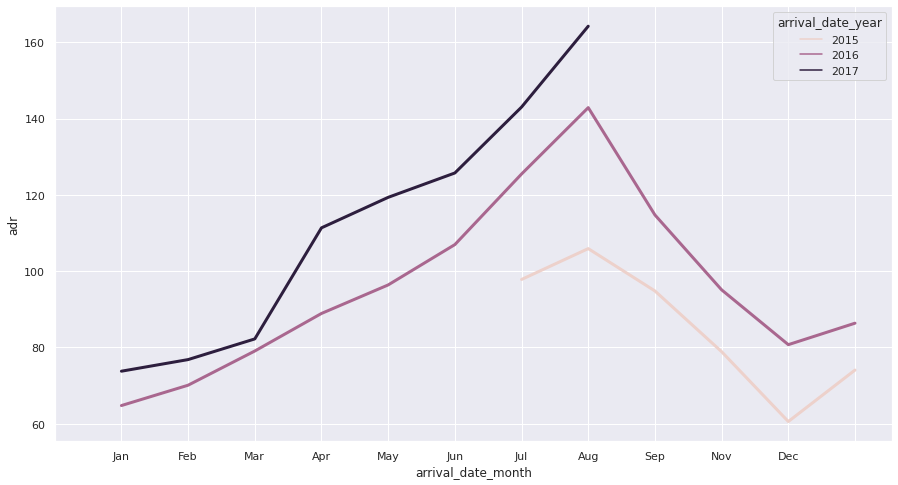

In [184]:
sns.set(rc={'figure.figsize':(15,8)})

adr_data=hotel.copy()
adr_data.replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11 ,'December':12},inplace=True)
r=sns.lineplot(data= adr_data , x='arrival_date_month',y='adr',hue='arrival_date_year',ci=None,linewidth=3)
r.set_xticks(range(13))
r.set_xticklabels(['',"Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

#**Adr by different rooms**

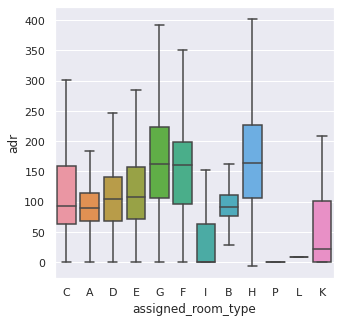

In [97]:
sns.boxplot(data=hotel,x='assigned_room_type',y='adr',showfliers = False)